In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
from pprint import pprint

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=True
from matplotlib.ticker import FuncFormatter

In [3]:
# 加载数据
data = []
feature_method = ['CHI','IG','MI']
is_inter = ['False','True']
for f in feature_method:
    for inter in is_inter:
        data.append(np.load('./np_cluster_pro/np_{}_{}.npy'.format(f,inter)))

In [4]:
# 去除数据中的最后一列，获得用于聚类的数据
def split_data(data):
    return data[:,0:-1]


def standard_data(data):
    print('data:{}'.format(data.shape))
    scaler = StandardScaler()
    np1 = scaler.fit_transform(data[:,0:2])
    np2 = data[:,2:4]
    np3 = scaler.fit_transform(data[:,4:])
    ans = np.hstack((np1,np2,np3))
    print('scale_data:{}'.format(ans.shape))
    return ans

In [ ]:
cluster_data = split_data(data[5])
cluster_data = standard_data(cluster_data)
model = SpectralClustering(n_clusters=3).fit(cluster_data)

data:(3205, 94)
scale_data:(3205, 94)


D:\software\Anaconda3\envs\dataAnalysis\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [5]:
# 偶数表示没有进行插值处理 奇数表示进行了插值处理

code = {
    0:'CHI(without Interpolation)',
    1:'CHI(with Interpolation)',
    2:'IG(without Interpolation)',
    3:'IG(with Interpolation)',
    4:'MI(without Interpolation)',
    5:'MI(with Interpolation)',
}
code_ = {
    0:'谱聚类',
    1:'Kmeans++'
}

In [14]:
# 先看全部
inertia = {}
SC = {}
for idx,data_item in enumerate([data[4],data[5]]):
    print('----{}-----'.format(idx))
    cluster_data = split_data(data_item)
    cluster_data = standard_data(cluster_data)
    n_cluster = np.arange(2,46,1)
    print('cluster_data:{}'.format(cluster_data.shape))
    inertia[code_[idx]] = []
    SC[code_[idx]] = []
    for n in n_cluster:
        model = KMeans(n_clusters=n,init='k-means++',max_iter=4000).fit(cluster_data)
        inertia[code_[idx]].append(model.inertia_)
        SC[code_[idx]].append(silhouette_score(cluster_data,model.labels_))

----0-----
data:(3205, 94)
scale_data:(3205, 94)
cluster_data:(3205, 94)
----1-----
data:(3205, 94)
scale_data:(3205, 94)
cluster_data:(3205, 94)


<Figure size 650x450 with 0 Axes>

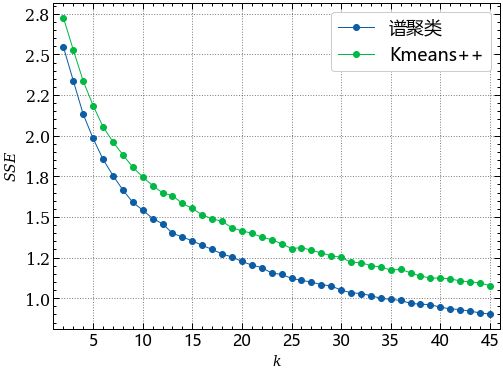

In [15]:
def formatnum(x, pos):
    return '$%.1f$' % (x/100000)
formatter1 = FuncFormatter(formatnum)
with plt.style.context(['science','grid','notebook']):
    plt.figure(figsize=(6.5,4.5),dpi=100)
    fig,ax = plt.subplots(1,1)
    ax.yaxis.set_major_formatter(formatter1)
    plt.xlim([1,46])
    for num in range(2):
        plt.plot(n_cluster,inertia[code_[num]],linewidth=1,marker='o',label=code_[num])
    plt.xlabel(r'$k$',fontdict={'size':14})
    plt.ylabel(r'$SSE$',fontdict={'size':14})
    plt.legend(prop={'size':18})
    plt.show()

<Figure size 650x450 with 0 Axes>

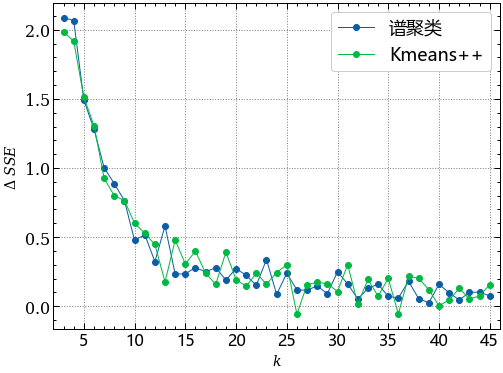

In [16]:
def formatnum(x, pos):
    return '$%.1f$' % (x/10000)
formatter2 = FuncFormatter(formatnum)
with plt.style.context(['science','grid','notebook']):
    plt.figure(figsize=(6.5,4.5),dpi=100)
    fig,ax = plt.subplots(1,1)
    ax.yaxis.set_major_formatter(formatter2)
    plt.xlim([2,46])
    for num in range(2):
        plt.plot(n_cluster[1:],-np.diff(inertia[code_[num]]),linewidth=1,marker='o',label=code_[num])
    plt.xlabel(r'$k$',fontdict={'size':14})
    plt.ylabel(r'$\Delta\ SSE$',fontdict={'size':14})
    plt.legend(prop={'size':18})
    plt.show()

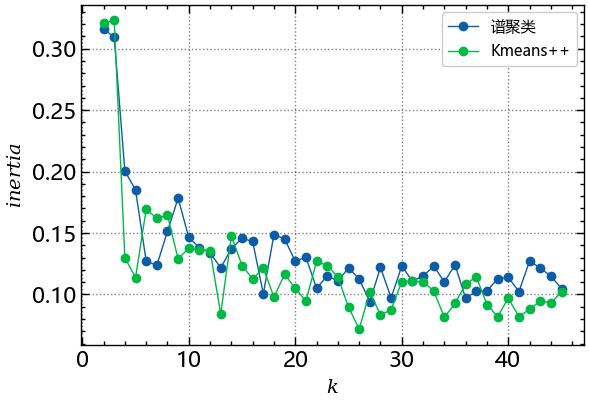

In [9]:
with plt.style.context(['science','grid','notebook']):
    fig= plt.figure(figsize=(6.5,4.5),dpi=100)
#     plt.xlim([0,14])
    for num in range(2):
        plt.plot(n_cluster,SC[code_[num]],linewidth=1,marker='o',label=code_[num])
    plt.xlabel(r'$k$',fontdict={'size':14})
    plt.ylabel(r'$inertia$',fontdict={'size':14})
    plt.legend(prop={'size':11})
    plt.show()